In [2]:
import pandas as pd
X = pd.read_csv('/Users/raashidkhan/Coding/GitHub-Projects/MNIST_Classification/data/mnist_data.csv').to_numpy()
y = pd.read_csv('/Users/raashidkhan/Coding/GitHub-Projects/MNIST_Classification/data/mnist_target.csv').to_numpy().ravel()

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

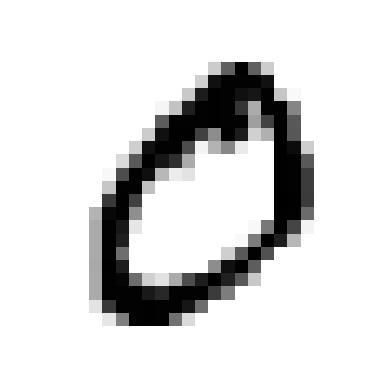

0


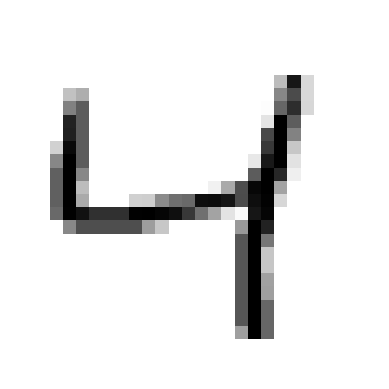

4


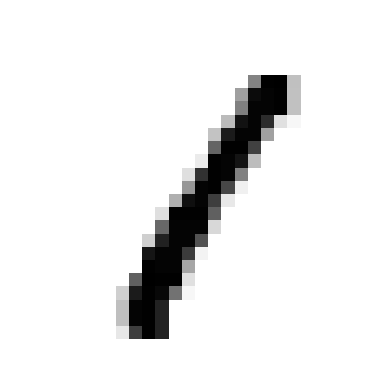

1


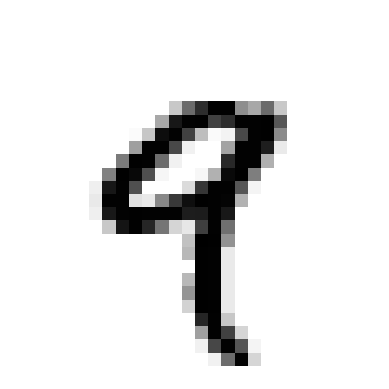

9


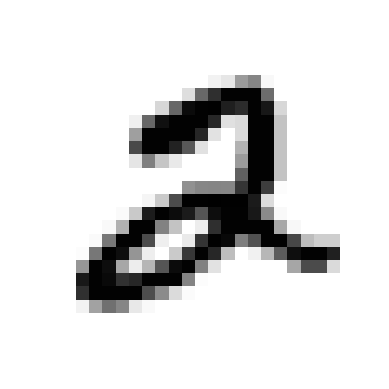

2


In [4]:
i=0
while i!=5:
        some_digit=X[i]
        some_digit_image = some_digit.reshape(28, 28)
        plt.imshow(some_digit_image, cmap="binary")
        plt.axis("off")
        plt.show()
        print (y[i])
        i=i+1

In [5]:
X_train,y_train,X_test,y_test=X[0:60000],y[0:60000],X[60000:],y[60000:]

In [6]:
y_train_5,y_test_5=y_train==5,y_test==5

In [7]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(random_state=42)
model.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [8]:
import numpy as np
from sklearn.metrics import accuracy_score  # or: from sklearn.metrics import mean_squared_error
preds = model.predict(X_train)
# example: print accuracy on training set (if desired)
print("train accuracy:", accuracy_score(y_train_5, preds))


train accuracy: 0.9639333333333333


In [9]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(random_state=42,n_splits=3,shuffle=True)

In [10]:
for train_index,test_index in sk_fold.split(X_train,y_train_5):
    cloned_model=clone(model)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_folds=X_train[test_index]
    y_test_folds=y_train_5[test_index]
    cloned_model.fit(X_train_folds,y_train_folds)

    fold_preds=cloned_model.predict(X_test_folds)
    print ((sum(fold_preds==y_test_folds))/len(y_test_folds))

    


0.96545
0.9623
0.96095


In [11]:
#now let us use cross val
from sklearn.model_selection import cross_val_score
print (cross_val_score(model,X_train,y_train_5,cv=3,scoring='accuracy'))

[0.97015 0.96695 0.95105]


In [12]:
#so we are getting an accuracy of almost 96%
#it seems perfect, but remember: sampling data has almost 90% of not-5, 
#so if you always guess that an image is not a 5, you will be right about 90% of the time.
#This demonstrates why accuracy is generally not the preferred performance measure
#for classifiers, especially when you are dealing with skewed datasets (i.e., when some
#classes are much more frequent than others).

In [13]:
import numpy as np
from sklearn.base import BaseEstimator
class never5(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [14]:
never5clf=never5()
print (cross_val_score(never5clf,X_train,y_train_5,cv=3,scoring='accuracy'))

[0.91125 0.9086  0.90915]


In [15]:
#This is shocking. even if the all the predictions are not-5, the accuracy is 91%,
#haha